#### **Imports**

In [115]:
import scipy
from scipy.interpolate import splrep, BSpline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# For colors
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Exercise 1**

In [116]:
df_DustLog = pd.read_csv('DustLog_forClass.dat', sep='\s+', header=None)
df_DustLog.columns = ['Depth', 'Logger']

In [117]:
smoothness = round( len(df_DustLog['Depth']) + np.sqrt(2*len(df_DustLog['Depth'])) )

In [135]:
f_linear = scipy.interpolate.interp1d(df_DustLog['Depth'],df_DustLog['Logger'],kind='linear')
f_cubic = scipy.interpolate.interp1d(df_DustLog['Depth'],df_DustLog['Logger'],kind='cubic')

x_new = np.arange(min(df_DustLog['Depth']),max(df_DustLog['Depth']),50)

# y_smooth = f_smooth(x_new)
y_linear = f_linear(x_new)
y_cubic = f_cubic(x_new)
tck = splrep(df_DustLog['Depth'],df_DustLog['Logger'], s=smoothness)

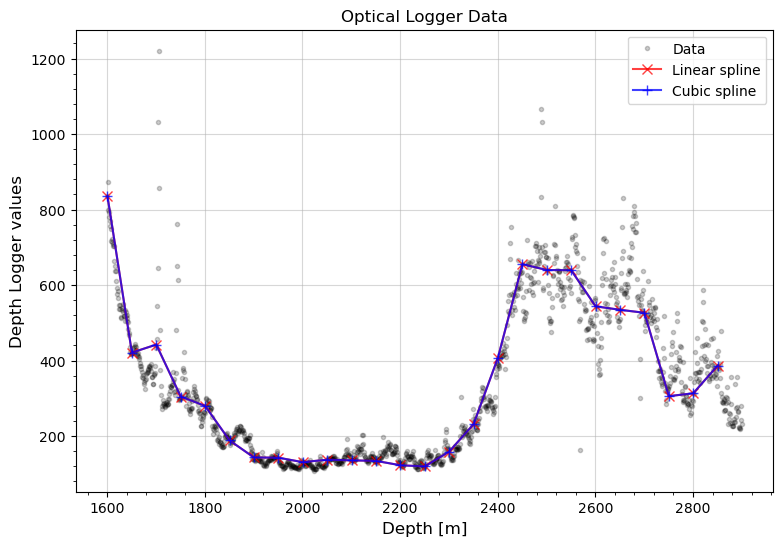

In [137]:
plt.figure(figsize=(9,6))

plt.plot(df_DustLog['Depth'],df_DustLog['Logger'],'o',alpha =0.2,markersize = 3,label='Data',color='black')
plt.plot(x_new,y_linear,marker='x',alpha=0.75,markersize=7.,label='Linear spline',color = 'red')
plt.plot(x_new,y_cubic,marker='+',alpha=0.75,markersize=7.,label='Cubic spline',color = 'blue')
#plt.plot(x_new, BSpline(*tck)(x_new),marker='d',alpha=0.75,markersize=7.,label='Smooth spline',color = 'green')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Optical Logger Data',fontsize=12)
plt.xlabel('Depth [m]',fontsize=12)
plt.ylabel('Depth Logger values',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.legend()
plt.show()

#### **Exercise 2**

In [138]:
df_Spline = pd.read_csv('SplineCubic.txt', sep='\s+', header=None)
df_Spline.columns = ['X', 'Y']

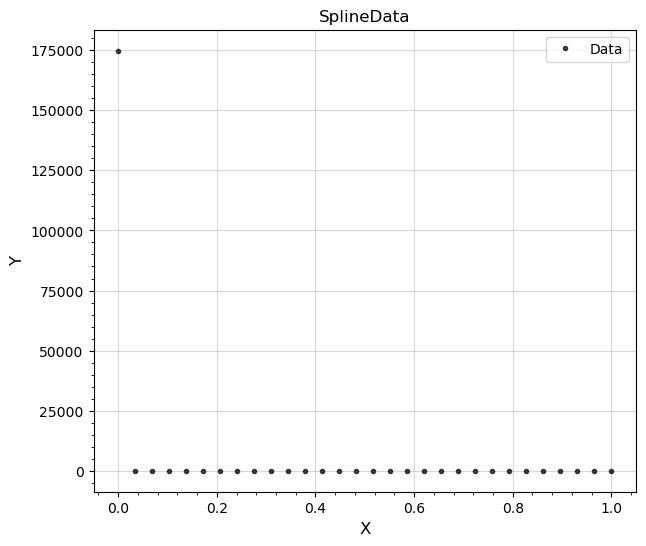

In [152]:
plt.figure(figsize=(7,6))

plt.plot(df_Spline['X'],df_Spline['Y'],'o',alpha =0.7,markersize = 3,label='Data',color='black')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('SplineData',fontsize=12)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.legend()
plt.show()